In [1]:
from preprocess import get_prepared_data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from tslearn.shapelets import ShapeletModel
from tslearn.utils import to_time_series_dataset


2025-01-26 16:29:01.296007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737905341.312344  172523 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737905341.316989  172523 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 16:29:01.332991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# Load preprocessed, prepared data with original labels
# We want to divide the data into original 5 classes
X, y = get_prepared_data(oversample=False, relabel=False, standard_scaler= False)

X = to_time_series_dataset(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
model = ShapeletModel(shapelet_length=1,max_iter=200, random_state=42)

# Trening modelu
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/home/kiri/hackaton/neurohackathon/venv/lib/python3.10/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Accuracy: 0.5265700483091788
Precision: 0.595196255520782
Recall: 0.5265700483091788

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.82      0.87       456
           2       0.55      0.04      0.07       455
           3       0.37      0.89      0.52       455
           4       0.54      0.82      0.65       456
           5       0.59      0.06      0.10       455

    accuracy                           0.53      2277
   macro avg       0.60      0.53      0.44      2277
weighted avg       0.60      0.53      0.45      2277


[[376  14  53  13   0]
 [ 18  18 383  29   7]
 [  3   1 404  42   5]
 [  5   0  70 375   6]
 [  2   0 195 232  26]]


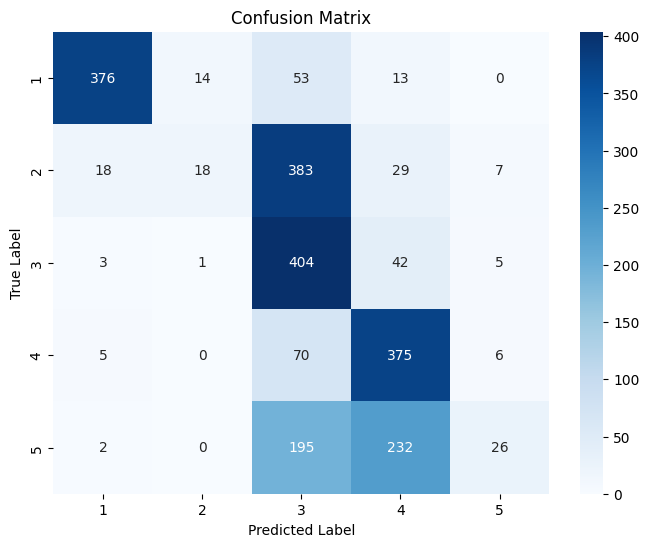

In [26]:
# Evaluation of the results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print()
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
